In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import fitsio
import os

In [88]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
MEDIUM_SIZE = 30
SMALL_SIZE = 22
SSSMALL_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)
os.environ['PATH'] = '/global/common/sw/cray/sles15/x86_64/texlive/live/gcc/8.2.0/tiozj27/bin/x86_64-linux/:{}'.format(os.environ['PATH'])

In [84]:
targetdata = fitsio.read("summary/fba_summary_mtl_dark_south_cut_D_tiles_cut_D.fits")

In [89]:
n = len(targetdata)
print(n)

360114


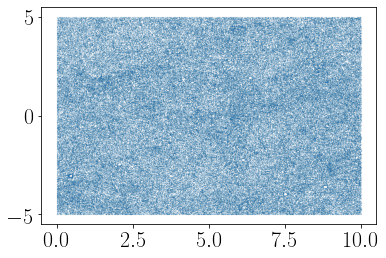

In [90]:
plt.scatter(targetdata['RA'], targetdata['DEC'], s=0.001)

In [91]:
theta = np.deg2rad(90.0 - targetdata['DEC'])
phi = np.deg2rad(targetdata['RA'])

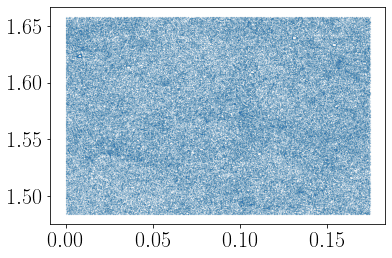

In [92]:
plt.scatter(phi, theta, s=0.001)

In [93]:
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

In [94]:
data = np.array([x,y,z])
data = data.T

In [95]:
np.shape(data)

(360114, 3)

In [96]:
from sklearn.neighbors import NearestNeighbors

In [97]:
neighbors = NearestNeighbors(n_neighbors=100, algorithm='ball_tree').fit(data)

In [98]:
dist, ind = neighbors.kneighbors(data)

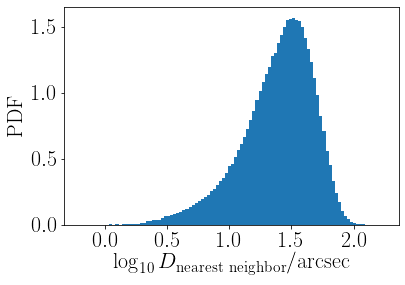

In [99]:
_=plt.hist(np.log10(np.rad2deg(dist[:,1])*3600.0), density=True, bins=100)
plt.xlabel("$\log_{10}  D_{\mathrm{nearest\ neighbor}} / \mathrm{arcsec}$")
plt.ylabel("PDF")
_ = plt.xticks(ticks=np.arange(0,2.2,0.5))

plt.savefig("DR8_neighbor_distro.pdf", bbox_inches='tight')